# 機械学習用日本語テキストデータ２
「機械学習用日本語テキストデータ」が長くなったのでその続き。

# 初期設定

In [1]:
import pandas as pd
import sys
import CaboCha
import os
import seaborn as sns
from urllib.error import HTTPError
import pickle
from sklearn.feature_extraction.text import CountVectorizer

sswords_file = "./stopwords.txt" # from SlothLib
data_dir = "./watchers/"
# log_dir = "./watchers.log/"
pickle_file1 = "./watchers.pickel"

cols_for_four=["eval","ind","reasons","txt"]
cols_for_five=cols_for_four[:]
del cols_for_five[2]

NUM_TO_IGNORE_4 = 14 # 4系データについてはこの単語数以下のデータを捨てる
NUM_TO_IGNORE_5 = 14 # 5系データについてはこの単語数以下のデータを捨てる

# データの読込み 

In [2]:
with open(pickle_file1, 'rb') as f:
    X_train_text4 = pickle.load(f)
    y_data_4 = pickle.load(f)
    y2_data_4 = pickle.load(f)
    X_train_text5 = pickle.load(f)
    y_data_5 = pickle.load(f)

## データ量確認

In [3]:
print("{} {}".format(X_train_text4.shape[0],X_train_text5.shape[0]))
print("{} {}".format(y_data_4.shape[0],y_data_5.shape[0]))
print("{}".format(y2_data_4.shape[0]))

83144 94177
83144 94177
83144


## 各ラベルの数量確認

In [4]:
# y_data_4.groupby(y_data_4).filter(lambda x: len(x) > 2)
original_4 = y_data_4.groupby(y_data_4).size()
original2_4 = y2_data_4.groupby(y2_data_4).size()
original_5 = y_data_5.groupby(y_data_5).size()
print(original_4,original2_4,original_5)

eval
0     1889
1    19428
2    40907
3    17427
4     3493
Name: eval, dtype: int64 reasons
0     17302
1      3504
2      5019
3     12582
4     17779
5      9799
6      5571
7      1520
8      4927
9       693
10      501
11     1046
12     1850
13     1051
Name: reasons, dtype: int64 eval
0     2098
1    23221
2    48337
3    16944
4     3577
Name: eval, dtype: int64


# データ取捨選択(長さ)

## トレーニングデータの各レコードの語数を取得

In [5]:
def get_length(_str):
    return len( _str.split() )
len4 = X_train_text4["txt"].map(get_length).to_frame()
len5 = X_train_text5["txt"].map(get_length).to_frame()
print(len(len4),len(len5))

83144 94177


In [6]:
print("{} {}".format(X_train_text4.shape[0],X_train_text5.shape[0]))
print("{} {}".format(y_data_4.shape[0],y_data_5.shape[0]))
print("{}".format(y2_data_4.shape[0]))

83144 94177
83144 94177
83144


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f338c747470>]]                 txt
count  83144.000000
mean      16.299504
std        9.567171
min        1.000000
25%        9.000000
50%       14.000000
75%       21.000000
max       88.000000


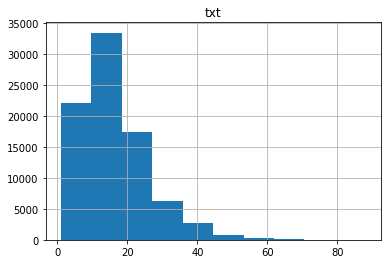

In [7]:
print("{} {}".format(len4.hist("txt"),len4.describe()))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f338a6ac6d8>]]                 txt
count  94177.000000
mean      16.013517
std        9.197724
min        1.000000
25%        9.000000
50%       14.000000
75%       21.000000
max       87.000000


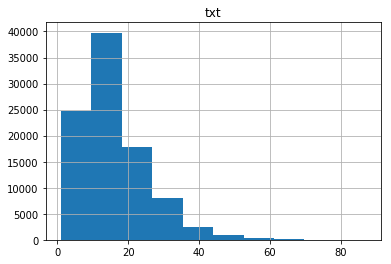

In [8]:
print("{} {}".format(len5.hist("txt"),len5.describe()))

In [25]:
X_train_text4

,txt
0,外国 観光 大量 買い なくなる 国内 による 土産 購入 ある 個人 消費 少し 持ち直す いる
1,流れ 戻る いる
2,来客 増加 傾向 続く いる 移る 絶好 行楽 シーズン 到来 道者 増加 いる 好影響 も...
3,ビール 値上げ 駆け込み 需要 られる 販売 伸びる おる 景気 やや 上向き なる いる
4,今期 入る 来客 増加 傾向 続く いる
5,前半 気温 高い 推移 飲料 酒類 精肉 需要 高まる 来客 増加 つながる また 平均 買...
6,ゴールデンウィーク 動き 活発 だ 後半 駆け込み 需要 ある 一時 動き ある 売上 増加 いる
7,ゴールデンウィーク 期間 天候 良い 行楽 利用 多い 売上 来客 共に 回復 傾向 ある ...
8,観光 増える おる 伴う 来客 売上 回復 いる
9,購入 客数 前年 アップ 単価 前年 アップ 堅調 推移 いる 特に 天候 良い なる 月末...


## 削除後レコード数事前確認

In [9]:
print(sum(len4["txt"]>NUM_TO_IGNORE_4),sum(len5["txt"]>NUM_TO_IGNORE_5))

40615 44944


## 削除
削除前レコード数確認、削除、削除後レコード数確認

In [10]:
print(X_train_text4.shape,y_data_4.shape,y2_data_4.shape)
y_data_4 = y_data_4[len4["txt"]>NUM_TO_IGNORE_4]
y2_data_4 = y2_data_4[len4["txt"]>NUM_TO_IGNORE_4]
X_train_text4 = X_train_text4[len4["txt"]>NUM_TO_IGNORE_4]
print(X_train_text4.shape,y_data_4.shape,y2_data_4.shape)

(83144, 1) (83144,) (83144,)
(40615, 1) (40615,) (40615,)


In [11]:
print(X_train_text5.shape,y_data_5.shape)
y_data_5 = y_data_5[len5["txt"]>NUM_TO_IGNORE_5]
X_train_text5 = X_train_text5[len5["txt"]>NUM_TO_IGNORE_5]
print(X_train_text5.shape,y_data_5.shape)

(94177, 1) (94177,)
(44944, 1) (44944,)


## 削除前、削除後数確認
各クラスのレコード数について削除前と削除を確認

In [12]:
# y_data_4.groupby(y_data_4).filter(lambda x: len(x) > 2)
removed_4 = y_data_4.groupby(y_data_4).size()
removed2_4 = y2_data_4.groupby(y2_data_4).size()
removed_5 = y_data_5.groupby(y_data_5).size()
# print(original_4,original2_4,original_5)
_o_sum = 0; _r_sum = 0
for _o, _r in zip(original_4,removed_4):
    print("y4 : ",_o,_r)
    _o_sum += _o
    _r_sum += _r
print("sum of y4 : ",_o_sum,_r_sum,"\n")
_o_sum = 0; _r_sum = 0
for _o, _r in zip(original2_4,removed2_4):
    print("y2_4 : ",_o,_r)
    _o_sum += _o
    _r_sum += _r
print("sum of y2_4 : ",_o_sum,_r_sum,"\n")
_o_sum = 0; _r_sum = 0
for _o, _r in zip(original_5,removed_5):
    _o_sum += _o
    _r_sum += _r
    print("y4 : ",_o,_r)
print("sum of y5 : ",_o_sum,_r_sum,"\n")

y4 :  1889 822
y4 :  19428 9193
y4 :  40907 20398
y4 :  17427 8599
y4 :  3493 1603
sum of y4 :  83144 40615 

y2_4 :  17302 7752
y2_4 :  3504 1823
y2_4 :  5019 2588
y2_4 :  12582 6562
y2_4 :  17779 8955
y2_4 :  9799 3812
y2_4 :  5571 2919
y2_4 :  1520 646
y2_4 :  4927 2633
y2_4 :  693 434
y2_4 :  501 307
y2_4 :  1046 549
y2_4 :  1850 1011
y2_4 :  1051 624
sum of y2_4 :  83144 40615 

y4 :  2098 796
y4 :  23221 10167
y4 :  48337 23727
y4 :  16944 8545
y4 :  3577 1709
sum of y5 :  94177 44944 



# ワーク

In [30]:
# delete me
#
# X_train_text4[0:10].values.tolist()
# X_train_text4[0:10]["txt"].tolist()

In [31]:
# delete me
#
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(X_train_text4[0:10]["txt"].tolist())
# print("{}\n{}".format(X.shape,X.toarray()))

In [32]:
# delete me
#
# print(vectorizer.vocabulary_.get('外国'))

In [33]:
# delete me
#
# X_train_text4[0:10]

# kerasパート
- kerasニューラルネットワークについては[(open)codez][1]の[Simple Text Classification using Keras Deep Learning Python Library][2]を参考にしている。

- グラフ機能はstackoverflowの[How to avoid overfitting on a simple feed forward network][3]を参考にしている。

[1]: https://www.opencodez.com/
[2]: https://www.opencodez.com/python/text-classification-using-keras.htm
[3]: https://stackoverflow.com/questions/44909134/how-to-avoid-overfitting-on-a-simple-feed-forward-network

In [48]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds

from keras import callbacks
from keras.layers import Dropout
import matplotlib.pyplot as plt

- log_dirを変更
- embedding_data=Noneを追加(無しでエラー発生)([kerasのcallbackのページを参考にした)][1]。  

[1]: https://keras.io/callbacks/


In [60]:
# tb = callbacks.TensorBoard(log_dir='./logs', histogram_freq=10, batch_size=32,
#                            write_graph=True, write_grads=True, write_images=False,
#                            embeddings_freq=0, embeddings_layer_names=None, 
#                            embeddings_metadata=None)
tb = callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, 
                           write_graph=True, write_grads=False, write_images=False, 
                           embeddings_freq=0, embeddings_layer_names=None, 
                           embeddings_metadata=None, embeddings_data=None)

In [36]:
X_train_text4.shape

(40615, 1)

## データ分割
上からy_data_4、y2_data_4、y_data_5用に分割。

In [37]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X_train_text4, y_data_4, test_size=0.20, random_state=42)
print("x : {} => {} & {}".format(len(X_train_text4),len(X_train4),len(y_test4)))
print("y : {} => {} & {}".format(len(y_data_4),len(y_train4),len(y_test4)))

x : 40615 => 32492 & 8123
y : 40615 => 32492 & 8123


In [67]:
# Xは上と同じだがここでは別変数にアサイン
X2_train4, X2_test4, y2_train4, y2_test4 = train_test_split(
    X_train_text4, y2_data_4, test_size=0.20, random_state=42)
print("x : {} => {} & {}".format(len(X_train_text4),len(X2_train4),len(y2_test4)))
print("y2: {} => {} & {}".format(len(y2_data_4),len(y2_train4),len(y2_test4)))

x : 40615 => 32492 & 8123
y2: 40615 => 32492 & 8123


In [32]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    X_train_text5, y_data_5, test_size=0.20, random_state=42)
print("x : {} => {} & {}".format(len(X_train_text5),len(X_train5),len(y_test5)))
print("y : {} => {} & {}".format(len(y_data_5),len(y_train5),len(y_test5)))

x : 44944 => 35955 & 8989
y : 44944 => 35955 & 8989


In [46]:
X_train4.shape

(32492, 1)

In [68]:
# num_labels = len(y_data_4.groupby(y_data_4).size())
num_labels = len(y2_data_4.groupby(y2_data_4).size())
# num_labels = 20
vocab_size = 15000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X2_train4["txt"])
 
x_train = tokenizer.texts_to_matrix(X2_train4["txt"], mode='tfidf')
x_test = tokenizer.texts_to_matrix(X2_test4["txt"], mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(y2_train4)
y_train = encoder.transform(y2_train4)
y_test = encoder.transform(y2_test4)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(32492, 15000) (8123, 15000) (32492, 5) (8123, 5)


In [69]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
#                     epochs=30,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tb])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               7680512   
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 14)                7182      
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


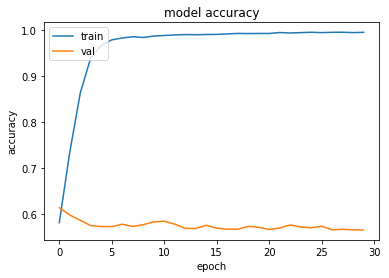

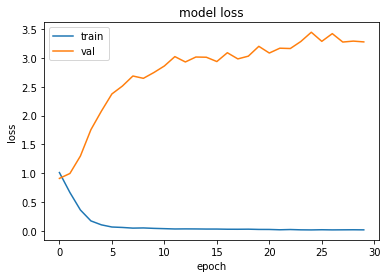

In [65]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
 
print('Test accuracy:', score[1])
 
# text_labels = encoder.classes_
 
# for i in range(10):
#     prediction = model.predict(np.array([x_test[i]]))
#     predicted_label = text_labels[np.argmax(prediction[0])]
# #     print(test_files_names.iloc[i])
#     print('Actual label:' + test_tags.iloc[i])
#     print("Predicted label: " + predicted_label)

8123/8123 [==============================] - 8s 1ms/step
Test accuracy: 0.5827896105425707


### ログ
いずれのケースもove

#### X_train4, X_test4, y_train4, y_test4
val系は低調なまま。
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               7680512   
_________________________________________________________________
activation_22 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_23 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 2565      
_________________________________________________________________
activation_24 (Activation)   (None, 5)                 0         
Total params: 7,945,733
Trainable params: 7,945,733
Non-trainable params: 0
_________________________________________________________________
Train on 29242 samples, validate on 3250 samples
Epoch 1/30
29242/29242 [==============================] - 85s 3ms/step - loss: 1.0117 - acc: 0.5821 - val_loss: 0.9102 - val_acc: 0.6145
Epoch 2/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.6650 - acc: 0.7352 - val_loss: 0.9958 - val_acc: 0.5988
Epoch 3/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.3615 - acc: 0.8634 - val_loss: 1.2990 - val_acc: 0.5874
Epoch 4/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.1721 - acc: 0.9400 - val_loss: 1.7561 - val_acc: 0.5757
Epoch 5/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.1034 - acc: 0.9668 - val_loss: 2.0786 - val_acc: 0.5738
Epoch 6/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0659 - acc: 0.9787 - val_loss: 2.3771 - val_acc: 0.5735
Epoch 7/30
29242/29242 [==============================] - 80s 3ms/step - loss: 0.0582 - acc: 0.9827 - val_loss: 2.5139 - val_acc: 0.5788
Epoch 8/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0467 - acc: 0.9855 - val_loss: 2.6887 - val_acc: 0.5738
Epoch 9/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0498 - acc: 0.9838 - val_loss: 2.6485 - val_acc: 0.5778
Epoch 10/30
29242/29242 [==============================] - 82s 3ms/step - loss: 0.0424 - acc: 0.9869 - val_loss: 2.7490 - val_acc: 0.5840
Epoch 11/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0372 - acc: 0.9881 - val_loss: 2.8628 - val_acc: 0.5852
Epoch 12/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0319 - acc: 0.9893 - val_loss: 3.0256 - val_acc: 0.5791
Epoch 13/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0333 - acc: 0.9901 - val_loss: 2.9326 - val_acc: 0.5698
Epoch 14/30
29242/29242 [==============================] - 79s 3ms/step - loss: 0.0323 - acc: 0.9898 - val_loss: 3.0183 - val_acc: 0.5695
Epoch 15/30
29242/29242 [==============================] - 79s 3ms/step - loss: 0.0303 - acc: 0.9903 - val_loss: 3.0147 - val_acc: 0.5766
Epoch 16/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0303 - acc: 0.9905 - val_loss: 2.9399 - val_acc: 0.5702
Epoch 17/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0272 - acc: 0.9917 - val_loss: 3.0929 - val_acc: 0.5680
Epoch 18/30
29242/29242 [==============================] - 82s 3ms/step - loss: 0.0268 - acc: 0.9926 - val_loss: 2.9858 - val_acc: 0.5680
Epoch 19/30
29242/29242 [==============================] - 52s 2ms/step - loss: 0.0282 - acc: 0.9923 - val_loss: 3.0335 - val_acc: 0.5742
Epoch 20/30
29242/29242 [==============================] - 52s 2ms/step - loss: 0.0239 - acc: 0.9925 - val_loss: 3.2042 - val_acc: 0.5720
Epoch 21/30
29242/29242 [==============================] - 52s 2ms/step - loss: 0.0234 - acc: 0.9925 - val_loss: 3.0877 - val_acc: 0.5674
Epoch 22/30
29242/29242 [==============================] - 52s 2ms/step - loss: 0.0178 - acc: 0.9945 - val_loss: 3.1716 - val_acc: 0.5708
Epoch 23/30
29242/29242 [==============================] - 52s 2ms/step - loss: 0.0221 - acc: 0.9936 - val_loss: 3.1660 - val_acc: 0.5772
Epoch 24/30
29242/29242 [==============================] - 52s 2ms/step - loss: 0.0169 - acc: 0.9944 - val_loss: 3.2879 - val_acc: 0.5729
Epoch 25/30
29242/29242 [==============================] - 51s 2ms/step - loss: 0.0154 - acc: 0.9952 - val_loss: 3.4488 - val_acc: 0.5711
Epoch 26/30
29242/29242 [==============================] - 73s 3ms/step - loss: 0.0185 - acc: 0.9944 - val_loss: 3.2908 - val_acc: 0.5745
Epoch 27/30
29242/29242 [==============================] - 80s 3ms/step - loss: 0.0159 - acc: 0.9950 - val_loss: 3.4247 - val_acc: 0.5668
Epoch 28/30
29242/29242 [==============================] - 82s 3ms/step - loss: 0.0171 - acc: 0.9952 - val_loss: 3.2785 - val_acc: 0.5680
Epoch 29/30
29242/29242 [==============================] - 81s 3ms/step - loss: 0.0181 - acc: 0.9944 - val_loss: 3.2948 - val_acc: 0.5665
Epoch 30/30
29242/29242 [==============================] - 82s 3ms/step - loss: 0.0165 - acc: 0.9950 - val_loss: 3.2812 - val_acc: 0.5665

#### X2_train4, X2_test4, y2_train4, y2_test4 (epoch数=5)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
===========================d======================================
dense_25 (Dense)             (None, 512)               7680512   
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 14)                7182      
_________________________________________________________________
activation_27 (Activation)   (None, 14)                0         
Total params: 7,950,350
Trainable params: 7,950,350
Non-trainable params: 0
_________________________________________________________________
Train on 29242 samples, validate on 3250 samples
Epoch 1/5
29242/29242 [==============================] - 84s 3ms/step - loss: 1.4725 - acc: 0.4873 - val_loss: 1.2602 - val_acc: 0.5588
Epoch 2/5
29242/29242 [==============================] - 81s 3ms/step - loss: 0.8440 - acc: 0.7049 - val_loss: 1.3282 - val_acc: 0.5468
Epoch 3/5
29242/29242 [==============================] - 81s 3ms/step - loss: 0.4373 - acc: 0.8506 - val_loss: 1.6427 - val_acc: 0.5465
Epoch 4/5
29242/29242 [==============================] - 82s 3ms/step - loss: 0.2160 - acc: 0.9275 - val_loss: 2.0535 - val_acc: 0.5415
Epoch 5/5
29242/29242 [==============================] - 87s 3ms/step - loss: 0.1214 - acc: 0.9609 - val_loss: 2.4631 - val_acc: 0.5289
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               7680512   
_________________________________________________________________
activation_25 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 14)                7182      
_________________________________________________________________
activation_27 (Activation)   (None, 14)                0         
Total params: 7,950,350
Trainable params: 7,950,350
Non-trainable params: 0
_________________________________________________________________
Train on 29242 samples, validate on 3250 samples
Epoch 1/5
29242/29242 [==============================] - 84s 3ms/step - loss: 1.4725 - acc: 0.4873 - val_loss: 1.2602 - val_acc: 0.5588
Epoch 2/5
29242/29242 [==============================] - 81s 3ms/step - loss: 0.8440 - acc: 0.7049 - val_loss: 1.3282 - val_acc: 0.5468
Epoch 3/5
29242/29242 [==============================] - 81s 3ms/step - loss: 0.4373 - acc: 0.8506 - val_loss: 1.6427 - val_acc: 0.5465
Epoch 4/5
29242/29242 [==============================] - 82s 3ms/step - loss: 0.2160 - acc: 0.9275 - val_loss: 2.0535 - val_acc: 0.5415
Epoch 5/5
29242/29242 [==============================] - 87s 3ms/step - loss: 0.1214 - acc: 0.9609 - val_loss: 2.4631 - val_acc: 0.5289